In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For pretty plots
sns.set_style("darkgrid")


Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load the dataset
df = pd.read_csv('owid-covid-data.csv')
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum().sort_values(ascending=False).head(10)


weekly_icu_admissions                      418442
weekly_icu_admissions_per_million          418442
excess_mortality                           416024
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality_cumulative_per_million    416024
weekly_hosp_admissions                     404938
weekly_hosp_admissions_per_million         404938
icu_patients_per_million                   390319
icu_patients                               390319
dtype: int64

In [4]:
countries = ["Nigeria", "India", "United States"]
df_filtered = df[df['location'].isin(countries)].copy()


In [6]:
# Forward fill per country
df_filtered[['total_cases', 'total_deaths', 'total_vaccinations']] = (
    df_filtered.groupby('location')[['total_cases', 'total_deaths', 'total_vaccinations']].fillna(method='ffill')
)

# Fill remaining NaNs with 0
df_filtered.fillna(0, inplace=True)


C:\Users\georg\AppData\Local\Temp\ipykernel_14712\2962819651.py:3: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  df_filtered.groupby('location')[['total_cases', 'total_deaths', 'total_vaccinations']].fillna(method='ffill')
C:\Users\georg\AppData\Local\Temp\ipykernel_14712\2962819651.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.groupby('location')[['total_cases', 'total_deaths', 'total_vaccinations']].fillna(method='ffill')


In [5]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'])


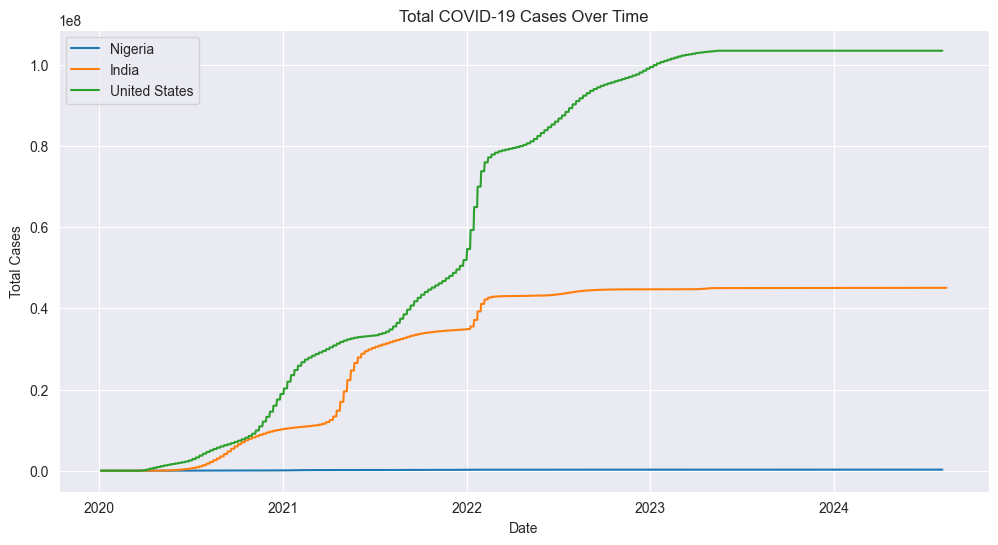

In [7]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()


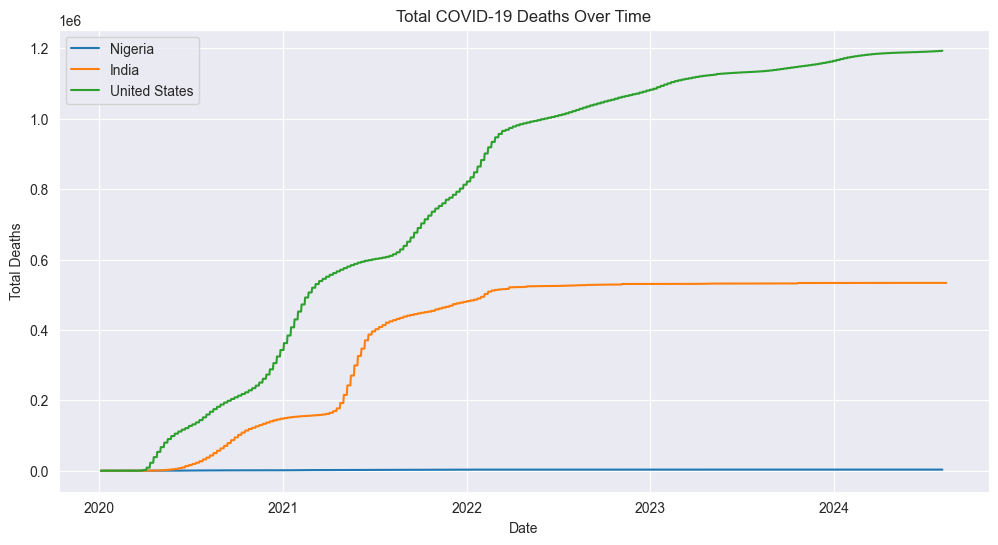

In [8]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()


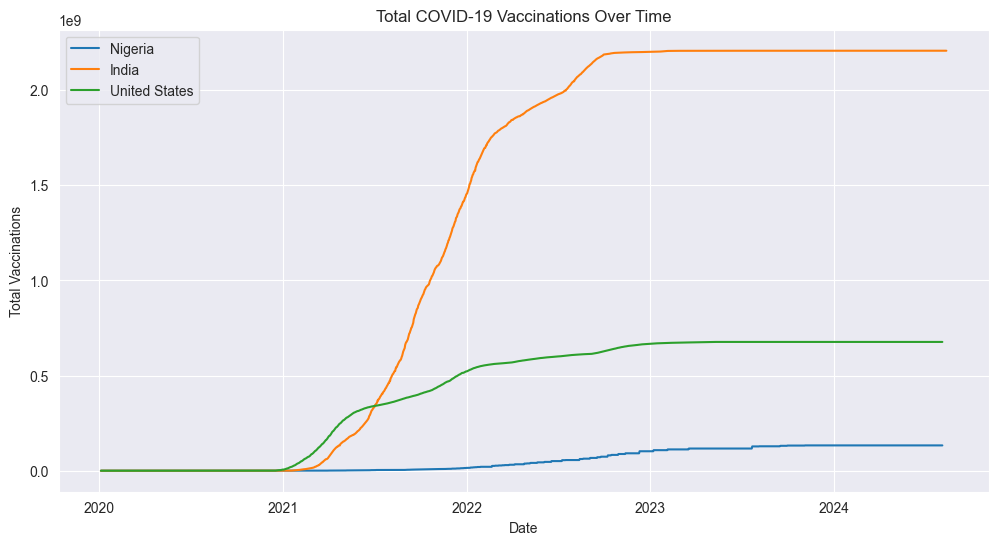

In [9]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.show()


In [10]:
df_filtered.groupby('location')[['total_cases', 'total_deaths', 'total_vaccinations']].max()


,total_cases,total_deaths,total_vaccinations
location,,,
India,45041748.0,533623.0,2.206868e+09
Nigeria,267188.0,3155.0,1.330480e+08
United States,103436829.0,1193165.0,6.767288e+08
